# Introduction
Exploratory Data Analysis (EDA) is a crucial step in any data science project. It helps us understand the structure of the data and its underlying patterns. In this article, we will be performing an EDA on the Titanic dataset. This dataset contains information about passengers on the Titanic, including whether they survived or not.

The Titanic dataset is a classic dataset used for data analysis and machine learning tasks. It consists of passenger information such as their age, gender, ticket fare, and cabin class, among others. This dataset is interesting because it can be used to predict which passengers survived the disaster based on their personal characteristics.

# Dataset:

The Titanic dataset contains information about 891 passengers and crew members aboard the Titanic when it sank on its maiden voyage in 1912. The dataset can be downloaded from Kaggle.

# Variables:

The dataset contains the following variables:

PassengerId: Unique identifier for each passenger.
Survived: Whether the passenger survived or not (0 = No, 1 = Yes).
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
Name: Passenger name.
Sex: Passenger gender (male or female).
Age: Passenger age in years.
SibSp: Number of siblings/spouses aboard.
Parch: Number of parents/children aboard.
Ticket: Ticket number.
Fare: Ticket fare.
Cabin: Cabin number.
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Data Preprocessing:

Before we start our analysis, we need to preprocess the data. This involves checking for missing values, removing duplicates, and converting variables to the correct data types.

First, let's load the dataset and check for missing values:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that there are missing values in the Age, Cabin, and Embarked variables. We will deal with missing values later in our analysis.

First, let's remove duplicates:

In [2]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis:

Now that we have preprocessed the data, we can start our EDA. We will explore the variables one by one and look for patterns and relationships.

* Survived:

Let's start by looking at the Survived variable, which tells us whether the passenger survived or not. We can create a count plot to see the number of passengers who survived and who did not:

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Survival Count')

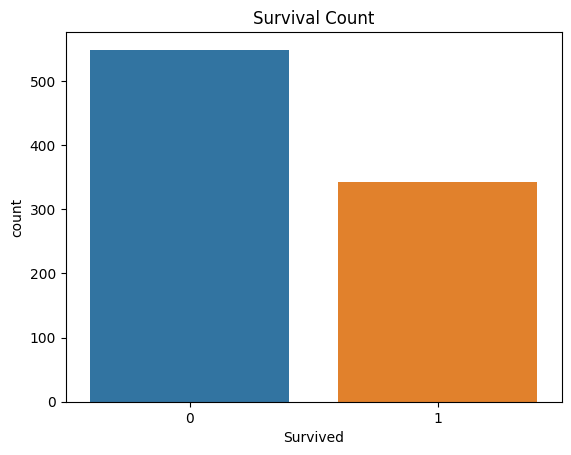

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=df)
plt.title("Survival Count")

We can see that most passengers did not survive the disaster. Around 350 passengers out of 891 survived the tragedy.

Now,'s investigate the **survival rate by gender**:

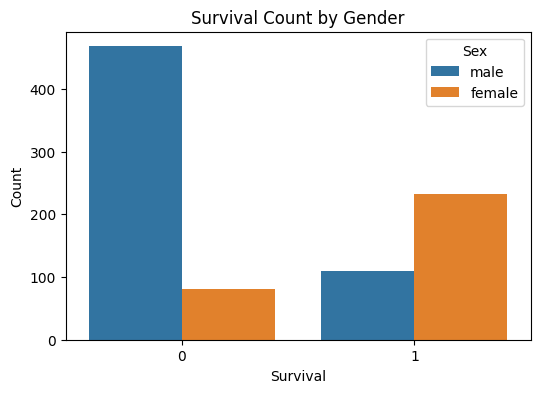

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

As we can see, there were significantly more male passengers on the Titanic than female passengers. However, the survival rate for female passengers is much higher than that for male passengers. This suggests that gender played an important role in survival.

Next, let's investigate the **survival rate by passenger class**:

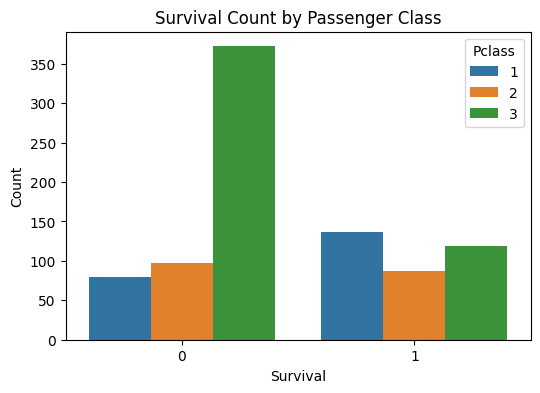

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

As we can see, the majority of passengers in third class did not survive the disaster. Meanwhile, a majority of first class passengers did survive. This suggests that passenger class was also an important factor in survival.

> **Age Distribution**

Now, let's take a closer look at age and its relationship to survival. We'll start by examining the **distribution of ages** in the dataset:

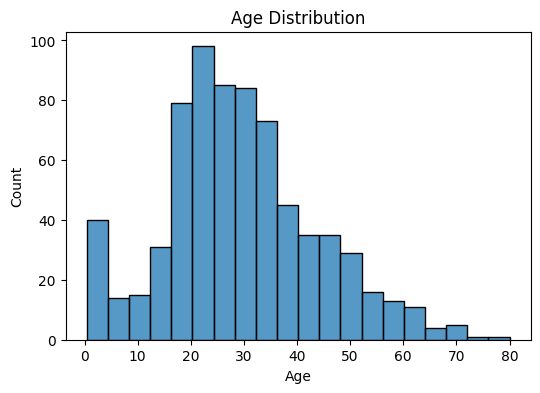

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As we can see, the majority of passengers on the Titanic were in their 20s or 30s. There were also quite a few young children on board.



Next, let's compare the **age distribution of surviving and non-surviving passengers**:

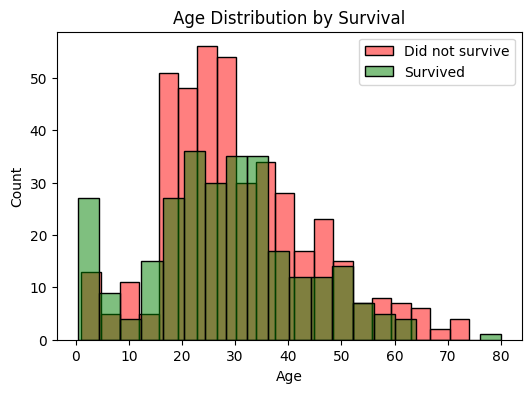

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(df[df['Survived'] == 0]['Age'], kde=False, bins=20, color='red', alpha=0.5, label='Did not survive')
sns.histplot(df[df['Survived'] == 1]['Age'], kde=False, bins=20, color='green', alpha=0.5, label='Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Looking at the age distribution, we can see that the passengers were mostly between the ages of 20 and 40. The survival rate is highest for children under the age of 10 and decreases with age. However, there is a higher survival rate among the older passengers (60-80 years) compared to those in the age group 20-50. This could be because they were given priority during the evacuation process.



> **Fare Distribution**

Now, let's take a look at the **distribution of fares paid by passengers**.

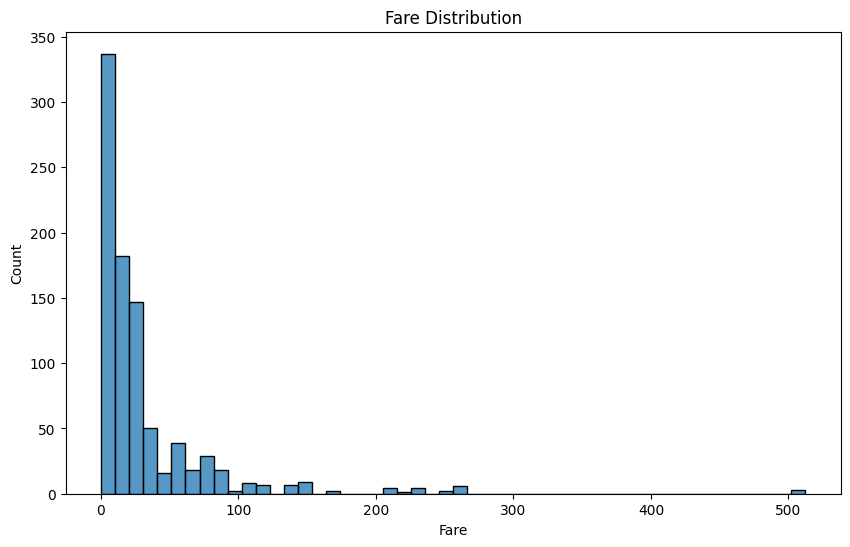

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=False, bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


We can see that most passengers paid fares below 50. However, there are a few passengers who paid much higher fares. These passengers may have been traveling in higher class cabins.

>  **Pclass vs. Survival**

Next, let's explore the relationship between passenger class and survival rate.

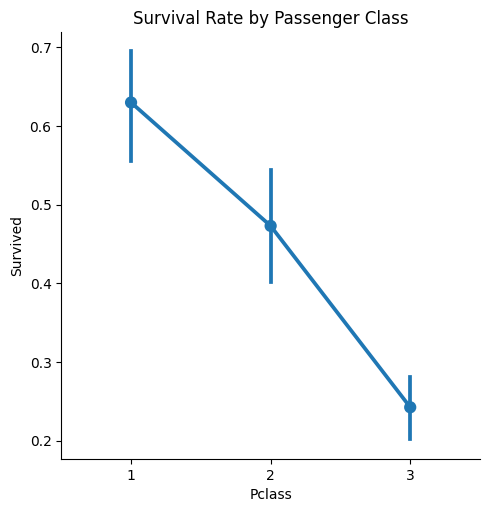

In [9]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

We can see that the survival rate decreases as we move from first class to third class. This indicates that passengers in higher class cabins were given priority during the evacuation process.

>  **Sex vs. Survival**

Let's also explore the relationship between sex and survival rate.

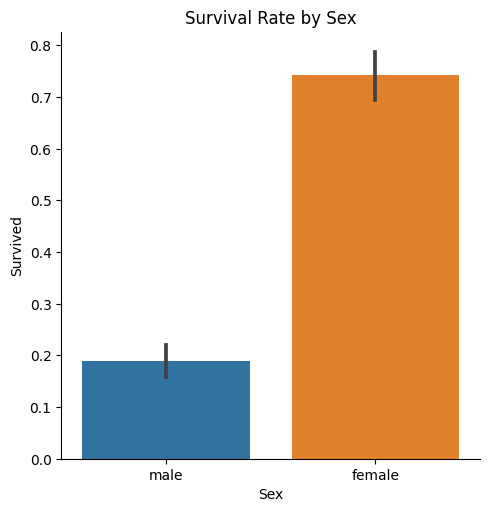

In [10]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=df)
plt.title('Survival Rate by Sex')
plt.show()


We can see that the survival rate is much higher for female passengers compared to male passengers. This could be because women and children were given priority during the evacuation process.

>  **SibSp and Parch**

The "SibSp" and "Parch" columns in the dataset tell us how many siblings/spouses and parents/children each passenger had aboard the Titanic, respectively. Let's explore the relationship between these variables and survival rate.

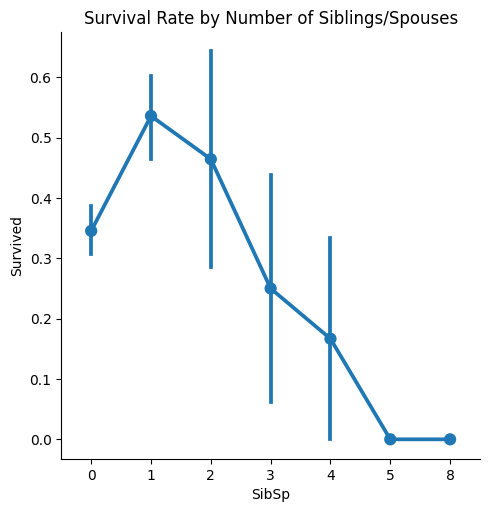

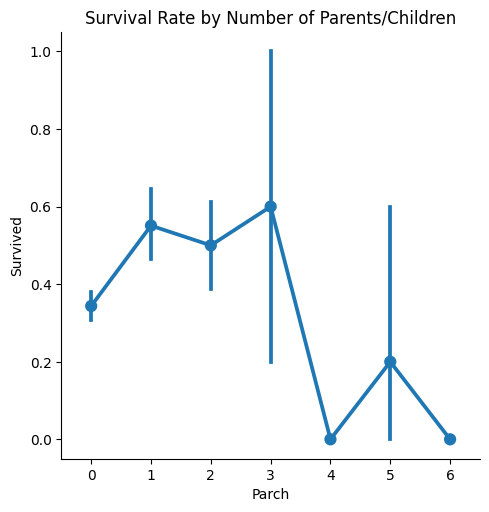

In [11]:
sns.catplot(x='SibSp', y='Survived', kind='point', data=df)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

sns.catplot(x='Parch', y='Survived', kind='point', data=df)
plt.title('Survival Rate by Number of Parents/Children')
plt.show()




We can combine these two columns into a single column representing the total size of the passenger's family. We'll also add 1 to include the passenger themselves in the count.

In [12]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


Let's create a countplot to visualize the distribution of FamilySize among the passengers.

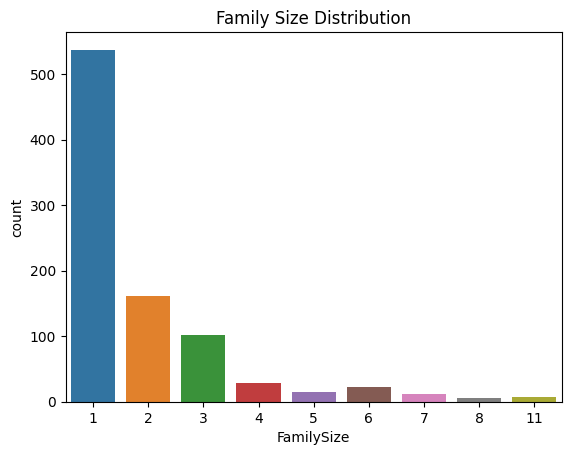

In [13]:
sns.countplot(x="FamilySize", data=df)
plt.title("Family Size Distribution")
plt.show()


We can see that most passengers were traveling alone, followed by passengers with a spouse or one child/parent.



Now, let's investigate whether the family size had an impact on survival.

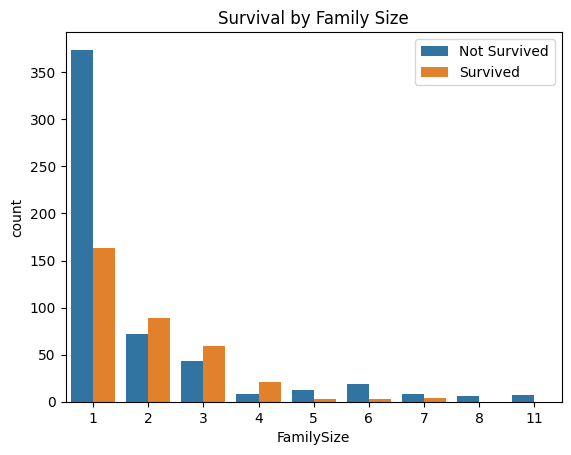

In [14]:
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.title("Survival by Family Size")
plt.legend(["Not Survived", "Survived"])
plt.show()


Passengers traveling alone had the lowest survival rate, while passengers with a family size of 2-4 had a higher chance of survival.


>  **Fare**

The Fare column represents the amount paid for the passenger's ticket. Let's take a look at the distribution of fares among the passengers.

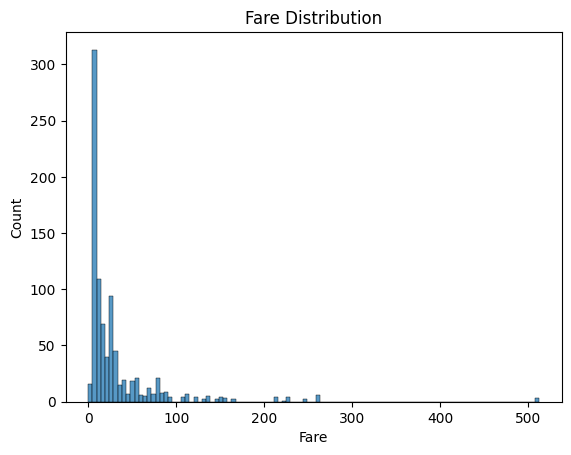

In [15]:
sns.histplot(df["Fare"])
plt.title("Fare Distribution")
plt.show()


We can see that the majority of passengers paid a relatively low fare, with a few outliers paying a much higher fare.



Now, let's investigate whether the fare paid had an impact on survival.

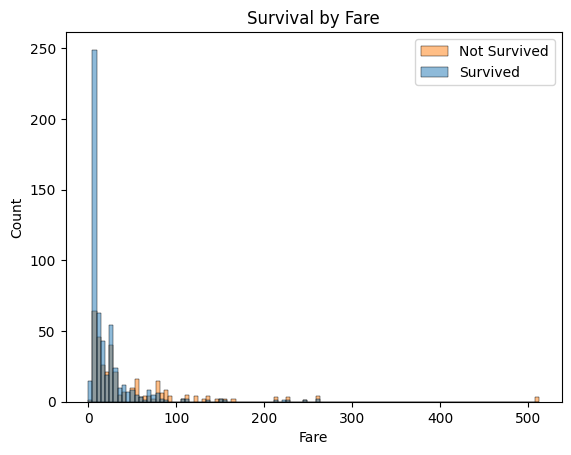

In [16]:
sns.histplot(x="Fare", hue="Survived", data=df)
plt.title("Survival by Fare")
plt.legend(["Not Survived", "Survived"])
plt.show()


Passengers who paid a higher fare had a higher chance of survival.




> **Embarked**

The Embarked column represents the port of embarkation for each passenger. Let's take a look at the distribution of embarkation ports.

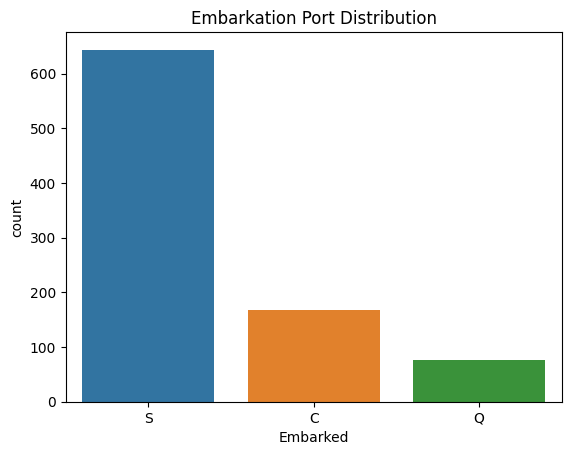

In [17]:
sns.countplot(x="Embarked", data=df)
plt.title("Embarkation Port Distribution")
plt.show()


Most passengers embarked from Southampton.

Now, let's investigate whether the embarkation port had an impact on survival.

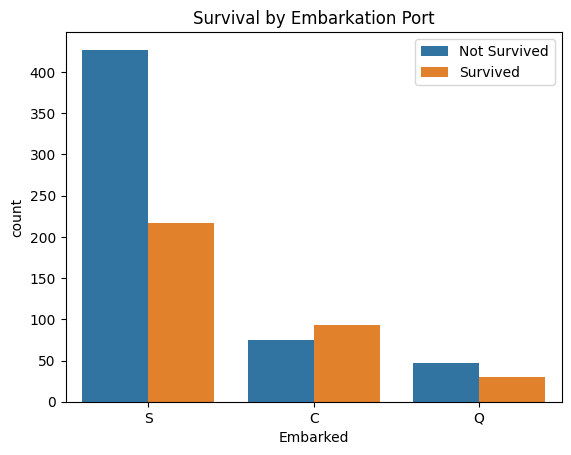

In [18]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarkation Port")
plt.legend(["Not Survived", "Survived"])
plt.show()


Passengers who embarked from Cherbourg had a higher chance of survival, followed by passengers who embarked from Queenstown.

Conclusion
In this EDA of the Titanic dataset, we explored the relationships between various features and the target variable Survived. We found that age, gender, passenger class, family size, fare, and embarkation port were all related to survival.

Based on our analysis, we can conclude that being a female, having a higher passenger class, traveling with family, and paying a higher fare all increased a passenger's chance of survival on the Titanic. This aligns with the historical records of the Titanic disaster, where women and children were given priority in the lifeboats, and those in higher classes had greater access to the lifeboats.

It is worth noting that our analysis is limited to the data available in the Titanic dataset, which may not fully capture all factors that contributed to a passenger's survival on the ship. Additionally, our analysis focused solely on identifying correlations between various features and survival, rather than establishing causal relationships. Further analysis and modeling would be needed to establish the strength and direction of the relationships between these features and survival, as well as to identify potential interactions and nonlinearities between them.

Overall, our EDA of the Titanic dataset provides valuable insights into the factors that may have influenced a passenger's survival on the ship. This information can be used to inform further analysis and modeling, as well as to gain a deeper understanding of the events that unfolded during the Titanic disaster.